In [2]:
from scipy.signal import butter, cheby1, filtfilt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("C:\\Users\\2lick\\OneDrive - post.bgu.ac.il\\Documents\\Final BSC Project\\Code\\Automation-of-spectral-measurements\\Results\\Recent Sample"+'\\'+'substance.csv', nrows=1)

In [4]:
def filter_df(df, values):
    filter_type = values['_FILTER_TYPE_']
    if filter_type == 'BW':
        filtered_df = butterworth_filter(df.copy(), float(values['_cutoff_BW']), int(values['_order_BW']))
    elif filter_type == 'cheby1':
        filtered_df = cheby1_filter(df.copy(), float(values['_cutoff_cheby1']), int(values['_order_cheby1']), float(values['_ripple_cheby1']))
    elif filter_type == 'MA':
        filtered_df = moving_average_filter(df.copy(), int(values['windows_size']))
    return filtered_df

def butterworth_filter(df, cutoff_freq, order):
    # Design the Butterworth low-pass filter
    b, a = butter(order, cutoff_freq, btype='low', analog=False, output='ba')
    for idx, row in df.iterrows():
        sample = np.asarray(row.iloc[10:], dtype=float)
        mean_of_sample = np.mean(sample)
        # Apply the filter to the sample signal
        filtered_signal = filtfilt(b, a, sample-mean_of_sample)
        df.iloc[idx,10:] = filtered_signal + mean_of_sample
    return df

def cheby1_filter(df, cutoff_freq, order, ripple):
    # Design the chebyshev 1 low-pass filter
    b, a = cheby1(order, ripple, cutoff_freq, btype='low', analog=False, output='ba')
    for idx, row in df.iterrows():
        sample = np.asarray(row.iloc[10:], dtype=float)
        mean_of_sample = np.mean(sample)
        # Apply the filter to the sample signal
        filtered_signal = filtfilt(b, a, sample-mean_of_sample)
        df.iloc[idx,10:] = filtered_signal + mean_of_sample
    return df

def moving_average_filter(df, window_size):
    for idx, row in df.iterrows():
        sample = np.asarray(row.iloc[10:], dtype=float)
        # Apply the moving average filter to the sample signal
        filtered_signal = pd.Series(sample).rolling(window_size).mean().fillna(method='bfill').values
        df.iloc[idx, 10:] = filtered_signal
    return df

In [5]:
values = {'_FILTER_TYPE_': 'BW', '_cutoff_BW': '0.03', '_order_BW': '4', '_cutoff_cheby1': '0.03', '_order_cheby1': '4', '_ripple_cheby1': '0.5', 'windows_size' : 30}
filtered_butter = filter_df(df, values)
values['_FILTER_TYPE_'] = 'cheby1'
filtered_cheby = filter_df(df, values)
values['_FILTER_TYPE_'] = 'MA'
filtered_MA = filter_df(df, values)

In [17]:
WL = 700
df.columns[2000-710]

'1528'

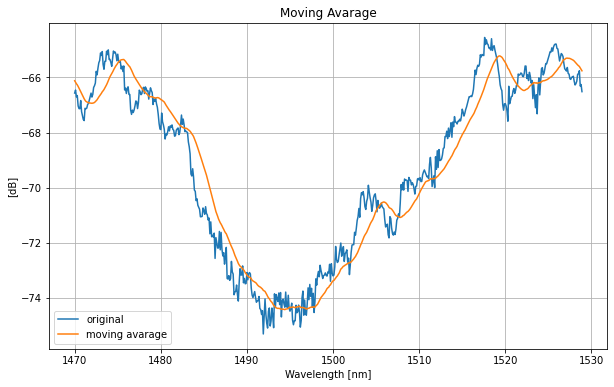

In [18]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the arrays
ax.plot(np.asarray(df.columns[WL+10:2000-WL], dtype=float), np.asarray(df.iloc[0,WL+10:2000-WL], dtype=float), label='original')
ax.plot(np.asarray(df.columns[WL+10:2000-WL], dtype=float), np.asarray(filtered_MA.iloc[0,WL+10:2000-WL], dtype=float), label='moving avarage')

# Add labels and title
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('[dB]')
ax.set_title('Moving Avarage')

# Add a legend
ax.legend()
ax.grid()

# Show the plot
plt.show()

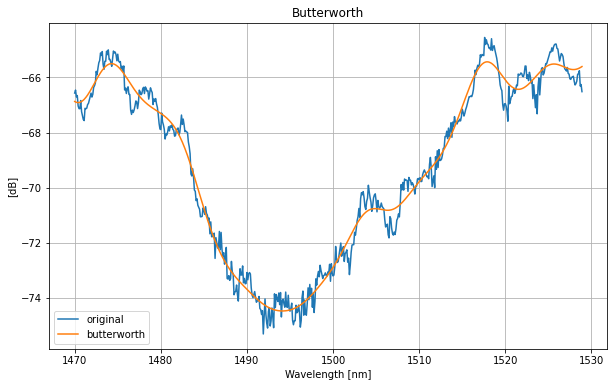

In [19]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the arrays
ax.plot(np.asarray(df.columns[WL+10:2000-WL], dtype=float), np.asarray(df.iloc[0,WL+10:2000-WL], dtype=float), label='original')
ax.plot(np.asarray(df.columns[WL+10:2000-WL], dtype=float), np.asarray(filtered_butter.iloc[0,WL+10:2000-WL], dtype=float), label='butterworth')

# Add labels and title
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('[dB]')
ax.set_title('Butterworth')

# Add a legend
ax.legend()
ax.grid()

# Show the plot
plt.show()

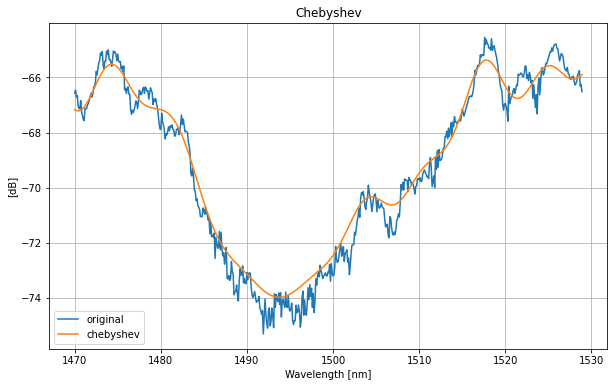

In [20]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the arrays
ax.plot(np.asarray(df.columns[WL+10:2000-WL], dtype=float), np.asarray(df.iloc[0,WL+10:2000-WL], dtype=float), label='original')
ax.plot(np.asarray(df.columns[WL+10:2000-WL], dtype=float), np.asarray(filtered_cheby.iloc[0,WL+10:2000-WL], dtype=float), label='chebyshev')

# Add labels and title
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('[dB]')
ax.set_title('Chebyshev')

# Add a legend
ax.legend()
ax.grid()

# Show the plot
plt.show()